In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
_PATH_ = "https://public.minsky.cc/maria/market_channel_factors_db"

In [76]:
df = pd.read_csv(_PATH_ + "/" + "databases/04ModelDatabaseOfWhitePotato.csv")

In [77]:
df = df.drop(columns=["Unnamed: 0"])

In [78]:
df.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'crop', 'production', 'totalProduction', 'percentProduction',
       'soldProduction', 'totalSoldProduction', 'percentSoldProduction',
       'farmGatePricePerKg', 'farmGateIncomes', 'totalFarmGateIncomes',
       'percentFarmGateIncomes', 'plantedArea', 'totalPlantedArea',
       'percentPlantedArea', 'yield', 'volumeOfDistrict', 'associative',
       'informalPriceInformation', 'formalPriceInformation',
       'informalMetereologicalInformation', 'formalMetereologicalInformation',
       'localMarket', 'regionalMarket', 'limaMarket', 'agroindustryMarket',
       'exportMarket', 'MARKET_NAN', 'MARKETS', 'MARKETS_QTY', 'marketSize',
       'collector', 'wholesaler', 'retailer', 'enterprise', 'finalConsumer',
       'marketChannelDirectedness', 'pointsOfSale', 'districtTimeToLimaMarket',
       'districtTimeToProvinceCapitalOfRegion', 'provinceCapitalToLimaMarket'],
      dtype='object')

# Changing scale

x1: District time to Lima Market [10 hours] <br>
x2: District time to Province capital [hours] <br>
x3: Province capital to Lima Market [10 hours] <br>
x4: Informal price information [0, 1] <br>
x5: Formal price information [0, 1] <br>
x6: Informal meteorological information [0, 1] <br>
x7: Formal meteorological information [0, 1] <br>
x8: Volume of district [1000 tons] <br>
x9: Volume of UA [100 tons] <br>
x10: Yield [Kg/m2] <br>
x11: Associativity [0, 1] <br>
x12: District´s points of sale [100 points] <br>
m1: Market size access [1: Local market, 2: Regional Market, 3: Lima Market] <br>
m2_a: Market channel directedness [1: Collector, 2: Wholesaler, 3: Retailer, 4: Final Consumer] <br>
y: Farm gate price per kg [S//Kg]

In [79]:
df["districtTimeToLimaMarket"] = df["districtTimeToLimaMarket"] / 10
df["districtTimeToProvinceCapitalOfRegion"] = df["districtTimeToProvinceCapitalOfRegion"] / 10
df["provinceCapitalToLimaMarket"] = df["provinceCapitalToLimaMarket"] / 10
df["informalPriceInformation"] = df["informalPriceInformation"]
df["formalPriceInformation"] = df["formalPriceInformation"]
df["informalMetereologicalInformation"] = df["informalMetereologicalInformation"]
df["formalMetereologicalInformation"] = df["formalMetereologicalInformation"]
df["volumeOfDistrict"] = df["volumeOfDistrict"] / 1000000
df["soldProduction"] = df["soldProduction"] / 100000
df["yield"] = df["yield"] / 10000
df["associative"] = df["associative"]
df["pointsOfSale"] = df["pointsOfSale"] / 100
df["marketSize"] = df["marketSize"].map({"Local market": 1, "Regional market": 2, "Lima markets": 3})
df["marketChannelDirectedness"] = df["marketChannelDirectedness"].map({"Collector": 1, "Wholesaler": 2, "Retailer": 3, "Final consumer": 4})
df["farmGatePricePerKg"] = df["farmGatePricePerKg"]

# Fixing multicollinearity

In [80]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [81]:
variables_x = ["districtTimeToLimaMarket", "districtTimeToProvinceCapitalOfRegion", "provinceCapitalToLimaMarket", "informalPriceInformation", "formalPriceInformation", "informalMetereologicalInformation", "formalMetereologicalInformation", "volumeOfDistrict", "soldProduction", "yield", "associative", "pointsOfSale"]


In [82]:
variables_m = ["marketSize", "marketChannelDirectedness"]

In [83]:
variable_y = ["farmGatePricePerKg"]

### Independent variables

In [84]:
X = df[variables_x].iloc[:,:-1]
calc_vif(X)

variables        VIF
0                districtTimeToLimaMarket  49.011815
1   districtTimeToProvinceCapitalOfRegion   3.681694
2             provinceCapitalToLimaMarket  42.336806
3                informalPriceInformation   2.893465
4                  formalPriceInformation   1.910775
5       informalMetereologicalInformation   2.088509
6         formalMetereologicalInformation   2.487261
7                        volumeOfDistrict   1.723726
8                          soldProduction   1.689467
9                                   yield   2.221088
10                            associative   1.066280

In [89]:
X = df[variables_x].drop(["provinceCapitalToLimaMarket", "pointsOfSale"],axis=1)
calc_vif(X)

variables       VIF
0               districtTimeToLimaMarket  4.270854
1  districtTimeToProvinceCapitalOfRegion  3.367297
2               informalPriceInformation  2.869678
3                 formalPriceInformation  1.910131
4      informalMetereologicalInformation  2.088096
5        formalMetereologicalInformation  2.466493
6                       volumeOfDistrict  1.721324
7                         soldProduction  1.685077
8                                  yield  2.220576
9                            associative  1.063587

### Mediator variables

In [90]:
M = df[variables_m]
calc_vif(M)

variables       VIF
0                 marketSize  2.787973
1  marketChannelDirectedness  2.787973

# Export dataframe for Model 1

In [91]:
variablesForModel = ["districtTimeToLimaMarket", "districtTimeToProvinceCapitalOfRegion", "provinceCapitalToLimaMarket", "informalPriceInformation", "formalPriceInformation", "informalMetereologicalInformation", "formalMetereologicalInformation", "volumeOfDistrict", "soldProduction", "yield", "associative", "pointsOfSale", "marketSize", "marketChannelDirectedness", "farmGatePricePerKg"]

In [92]:
indices = ["NOMBREDD", "NOMBREPV", "NOMBREDI", "CONGLOMERADO", "NSELUA", "UA"]

In [93]:
other = ["percentSoldProduction", "percentFarmGateIncomes", "percentPlantedArea"]

In [94]:
var = np.append(np.append(indices, other), variablesForModel)

In [95]:
df[var].to_csv("01ModelDataframeOfWhitePotato.csv")

# Import dataframe of Model 1

In [96]:
df01 = pd.read_csv("01ModelDataframeOfWhitePotato.csv")

In [97]:
len(df01)

2064

In [98]:
df01.columns

Index(['Unnamed: 0', 'NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO',
       'NSELUA', 'UA', 'percentSoldProduction', 'percentFarmGateIncomes',
       'percentPlantedArea', 'districtTimeToLimaMarket',
       'districtTimeToProvinceCapitalOfRegion', 'provinceCapitalToLimaMarket',
       'informalPriceInformation', 'formalPriceInformation',
       'informalMetereologicalInformation', 'formalMetereologicalInformation',
       'volumeOfDistrict', 'soldProduction', 'yield', 'associative',
       'pointsOfSale', 'marketSize', 'marketChannelDirectedness',
       'farmGatePricePerKg'],
      dtype='object')

# Segmentar por Farm gate price per kg

### x < 5 ton

In [99]:
df_5ton = df01[df01["soldProduction"] < 0.05].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [100]:
len(df_5ton)

1605

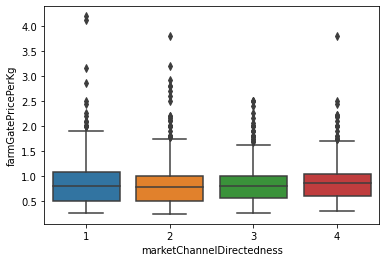

In [101]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton)

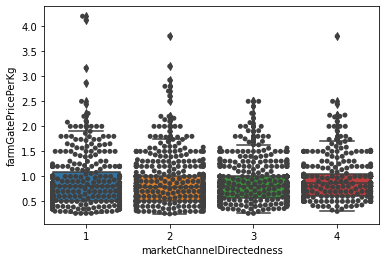

In [102]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5ton, color=".25")

### 5 ton ≤ x < 10 ton

In [103]:
df_5_10ton = df01[(df01["soldProduction"] >= 0.05) & (df["soldProduction"] < 0.10)].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [104]:
len(df_5_10ton)

224

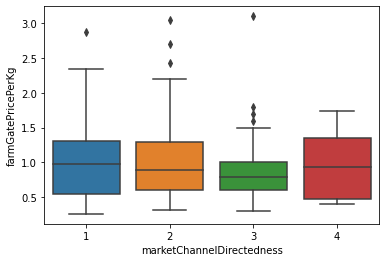

In [105]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton)

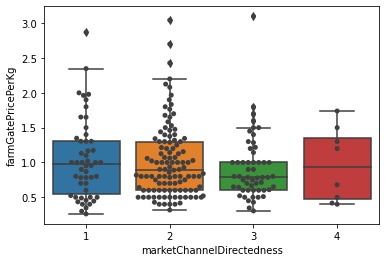

In [106]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_5_10ton, color=".25")

### x ≥ 10 ton

In [107]:
df_10_ton = df01[df01["soldProduction"] >= 0.10].drop(columns=["Unnamed: 0"]).reset_index(drop=True)

In [108]:
len(df_10_ton)

235

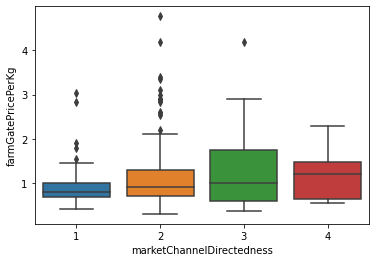

In [109]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton)

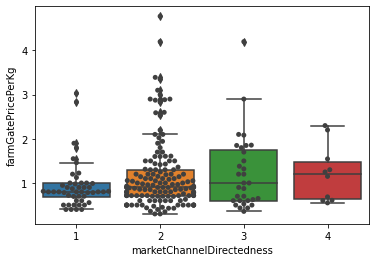

In [110]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df_10_ton, color=".25")

# All

In [111]:
len(df01)

2064

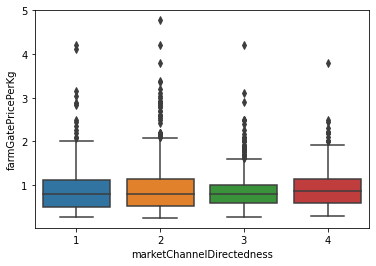

In [112]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01)

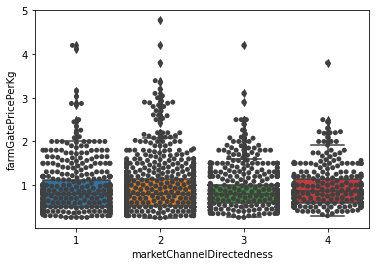

In [113]:
ax = sns.boxplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01)
ax = sns.swarmplot(x="marketChannelDirectedness", y="farmGatePricePerKg", data=df01, color=".25")

In [114]:
df_5ton.to_csv("01ModelDataframeOfWhitePotato_5ton.csv")
df_5_10ton.to_csv("01ModelDataframeOfWhitePotato_5_10ton.csv")
df_10_ton.to_csv("01ModelDataframeOfWhitePotato_10_ton.csv")